In [12]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

radial_velocities = pickle.load(open('./cepheid_data/cepheid_data_radial_velocities.pkl', 'rb'))['radial_velocities']
spectra_data = pickle.load(open('./cepheid_data/cepheid_spectra_data.pkl', 'rb'))
cepheid_data = pickle.load(open('./cepheid_data/cepheid_data.pkl', 'rb'))

In [14]:
pulsation_velocities = cepheid_data['pulsation_velocities']
phases = cepheid_data['phases']

In [21]:
LINE_CENTERS = [4896.439, 5049.82, 5044.21, 4924.77, 6347, 6371]
LINE_NAMES = ['Fe I', 'Fe I', 'Fe I', 'Fe I', 'Si II', 'Si II']
LINE_WIDTH = 2

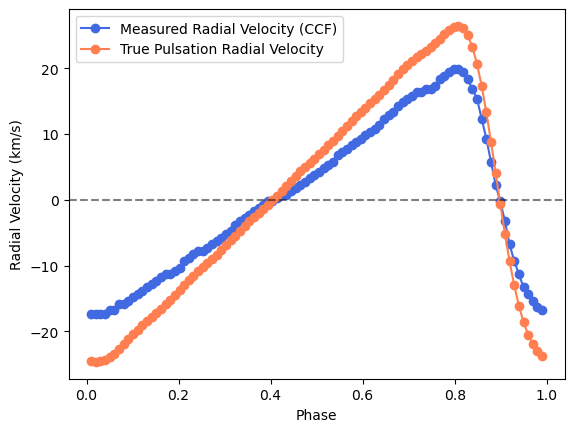

In [28]:
plt.plot(phases[1:-1], radial_velocities[3][1:-1], c='royalblue', marker='o', label='Measured Radial Velocity (CCF)')
plt.plot(phases[1:-1], pulsation_velocities[1:-1], c='coral', marker='o', label='True Pulsation Radial Velocity')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.xlabel('Phase')
plt.ylabel('Radial Velocity (km/s)')
plt.legend()

In [18]:
pfactors = np.nanmean(pulsation_velocities[1:]/radial_velocities[3][1:])
pfactors

1.4844432036433886

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import cmasher as cmr

spectra = spectra_data['spectra']
vws = spectra_data['vws']

def plot_line(i, fig, ax):
    # Calculate phases: assume spectra[0] is a list/array of spectra at different phases
    num_phases = len(spectra[i])
    phases = np.linspace(0, 1, num_phases, endpoint=False)

    # Create a colormap based on phase
    cmap = cm.get_cmap('cmr.bubblegum', num_phases)
    norm = plt.Normalize(vmin=np.min(phases), vmax=np.max(phases))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    for p in range(num_phases):
        # Map color to phase
        color = cmap(int(norm(phases[p]) * (num_phases-1)))
        ax.plot(
            vws[i],
            spectra[i][p][:, 0]/spectra[i][p][:, 1],
            color=color
        )
        
    # # Set colorbar ticks to phase valuesß
    # phase_ticks = [0, 0.25, 0.5, 0.75, 1]
    # cbar = fig.colorbar(sm, ax=ax, ticks=phase_ticks)
    # cbar.set_label('Phase')
    # Set x-ticks to only .0 and .5 in the wavelength range, formatted to one decimal place
    start = LINE_CENTERS[i] - LINE_WIDTH
    end = LINE_CENTERS[i] + LINE_WIDTH
    xticks = np.arange(np.ceil(start), np.ceil(end), 1.)
    xticks = np.round(xticks, 1)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f"{x:.1f}" for x in xticks])
    ax.set_title(f'Fe I Line {LINE_CENTERS[i]:.2f} Å')

/var/folders/7r/n_x0ntj511v_0gt816mgrc1c0000gq/T/ipykernel_47195/2188453714.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('cmr.bubblegum', num_phases)


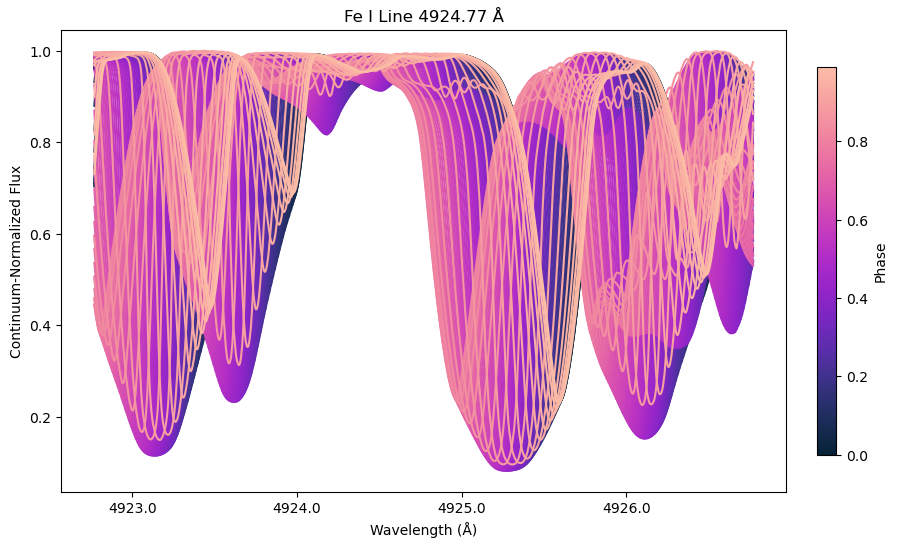

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

plot_line(3, fig, ax)
ax.set_ylabel('Continuum-Normalized Flux')
ax.set_xlabel('Wavelength (Å)')

num_phases = len(spectra[0])
phases = np.linspace(0, 1, num_phases, endpoint=False)
cmap = cmr.bubblegum
norm = plt.Normalize(vmin=np.min(phases), vmax=np.max(phases))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.04)
cbar.set_label('Phase')

plt.show()

/var/folders/7r/n_x0ntj511v_0gt816mgrc1c0000gq/T/ipykernel_47195/2188453714.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('cmr.bubblegum', num_phases)
/var/folders/7r/n_x0ntj511v_0gt816mgrc1c0000gq/T/ipykernel_47195/2188453714.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('cmr.bubblegum', num_phases)
/var/folders/7r/n_x0ntj511v_0gt816mgrc1c0000gq/T/ipykernel_47195/2188453714.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cma

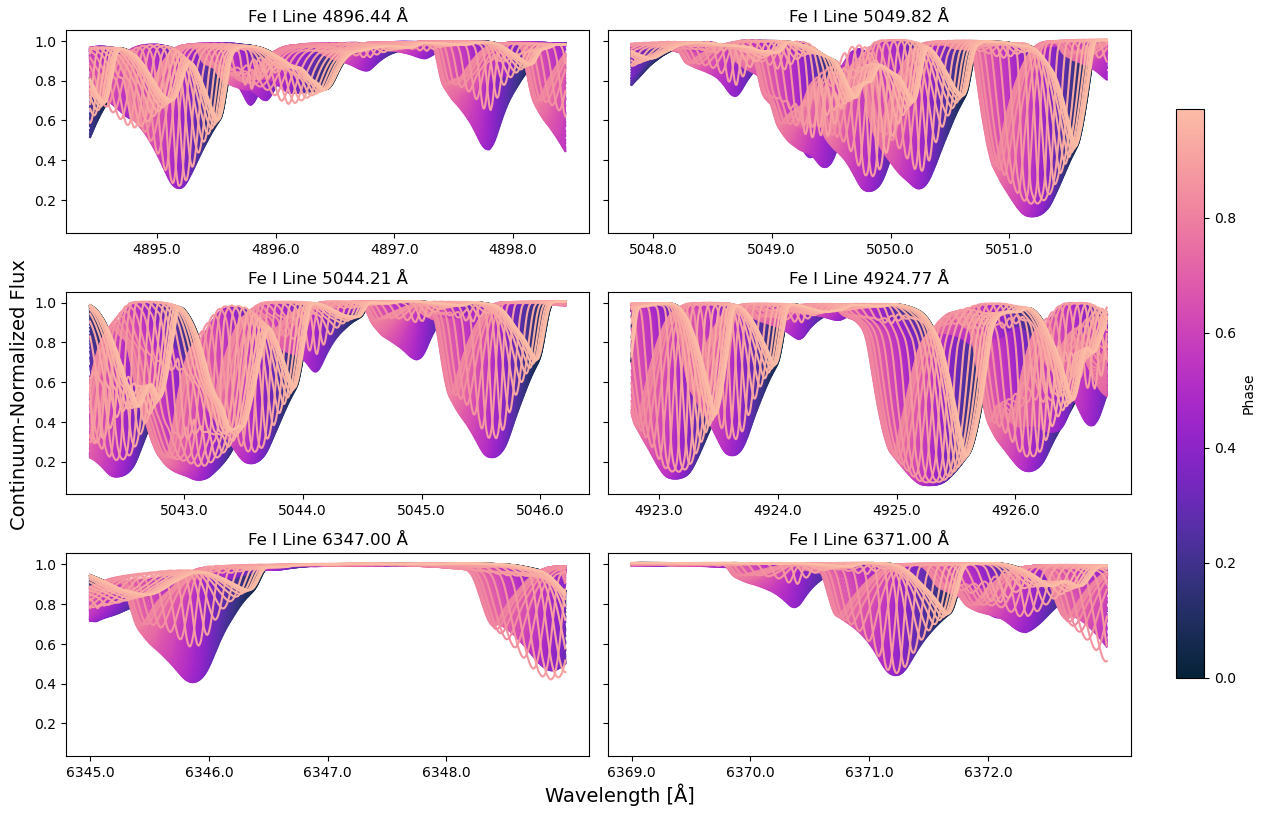

In [31]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 8), sharey=True)
plot_line(0, fig, ax[0, 0])
plot_line(1, fig, ax[0, 1])
plot_line(2, fig, ax[1, 0])
plot_line(3, fig, ax[1, 1])
plot_line(4, fig, ax[2, 0])
plot_line(5, fig, ax[2, 1])
plt.tight_layout()
fig.text(0.5, 0.0, 'Wavelength [Å]', ha='center', va='center', fontsize=14)
fig.text(0.0, 0.5, 'Continuum-Normalized Flux', ha='center', va='center', rotation='vertical', fontsize=14)
# Add a global colorbar for the whole figure
import cmasher as cmr  # assumes cmasher is available, as 'cmr.bubblegum' is used above

# Create a ScalarMappable for the colorbar
num_phases = len(spectra[0])
phases = np.linspace(0, 1, num_phases, endpoint=False)
cmap = cmr.bubblegum
norm = plt.Normalize(vmin=np.min(phases), vmax=np.max(phases))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Add the colorbar to the figure
cbar = fig.colorbar(sm, ax=ax, orientation='vertical', fraction=0.025, pad=0.04)
cbar.set_label('Phase')
plt.show()